In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tabulate import tabulate



In [ ]:
import pandas as pd

# Reading the CSV file from the same directory as the script
books = pd.read_csv('data.csv')

books=pd.DataFrame(books,columns=['title','synopsis','genre'])

# Rename the first four desired columns explicitly
books = books[['title', 'synopsis', 'genre']]

# Display the first few rows as a nicely formatted table
print(tabulate(books.head(), headers='keys', tablefmt='grid'))


+----+------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+
|    | title                                                                 

In [ ]:
# Group by the 'genre' column and count the number of books in each genre
genre_group = books.groupby('genre').size().reset_index(name='count')

# Display the grouped data as a DataFrame
print(genre_group)


             genre  count
0          fantasy    348
1          history     99
2           horror    100
3       psychology     99
4          romance    111
5          science     79
6  science_fiction     45
7           sports     79
8         thriller    481
9           travel     98


In [ ]:
#Displaying "summary" before preprocessing begins.

print("Snapshot of books['synopsis']\n\n")
books['synopsis']



Snapshot of books['synopsis']




,synopsis
0,"100,000 years ago, at least six human species ..."
1,"""Diamond has written a book of remarkable scop..."
2,"In the book, Zinn presented a different side o..."
3,Author Erik Larson imbues the incredible event...
4,Discovered in the attic in which she spent the...
...,...
1534,"Atticus O’Sullivan, last of the Druids, lives ..."
1535,Charlie Bucket's wonderful adventure begins wh...
1536,"""I live for the dream that my children will be..."
1537,"Rose loves Dimitri, Dimitri might love Tasha, ..."


In [ ]:
# function for text cleaning

def clean(text):
    # remove backslash-apostrophe
    text = re.sub("\'", "", text)
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]"," ",text)
    # remove whitespaces
    text = ' '.join(text.split())
    # convert text to lowercase
    text = text.lower()

    return text

books.loc[:,'synopsis']=books.loc[:,'synopsis'].apply(lambda x: clean(x))



#Displaying "summary" after text-cleaning.

print("Snapshot of books['synopsis']\n\n")
books['synopsis']

Snapshot of books['synopsis']




,synopsis
0,years ago at least six human species inhabited...
1,diamond has written a book of remarkable scope...
2,in the book zinn presented a different side of...
3,author erik larson imbues the incredible event...
4,discovered in the attic in which she spent the...
...,...
1534,atticus o sullivan last of the druids lives pe...
1535,charlie buckets wonderful adventure begins whe...
1536,i live for the dream that my children will be ...
1537,rose loves dimitri dimitri might love tasha an...


Graph to visualize the words and frequency in book's summary.




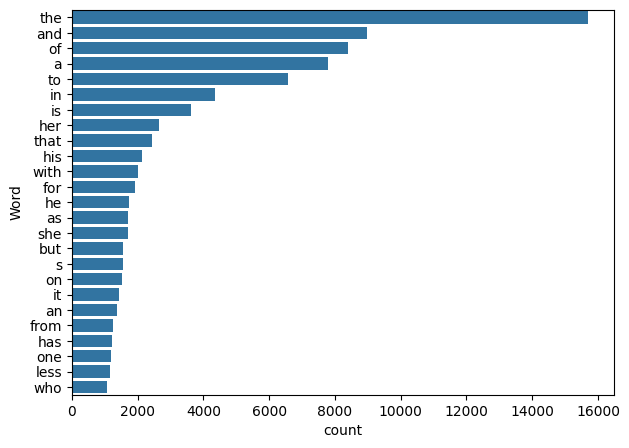

In [ ]:
print("Graph to visualize the words and frequency in book's summary.\n\n")

def freqwords(x, terms):
  allwords = ' '.join([text for text in x])
  allwords = allwords.split()
  fdist = nltk.FreqDist(allwords)
  wordsdf = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})


  d = wordsdf.nlargest(columns="count", n = terms)

  # visualize words and frequencies
  plt.figure(figsize=(7,5))
  ax = sns.barplot(data=d, x= "count", y = "word")
  ax.set(ylabel = 'Word')
  plt.show()

# print 25 most frequent words
freqwords(books['synopsis'], 25)

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

def lematizing(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


books['synopsis'] = books['synopsis'].apply(lambda x: lematizing(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#Displaying "summary" after Lemmmatization

print("Snapshot of books['synopsis']\n\n")

books['synopsis']

Snapshot of books['synopsis']




,synopsis
0,year ago at least six human specie inhabited t...
1,diamond ha written a book of remarkable scope ...
2,in the book zinn presented a different side of...
3,author erik larson imbues the incredible event...
4,discovered in the attic in which she spent the...
...,...
1534,atticus o sullivan last of the druid life peac...
1535,charlie bucket wonderful adventure begin when ...
1536,i live for the dream that my child will be bor...
1537,rose love dimitri dimitri might love tasha and...


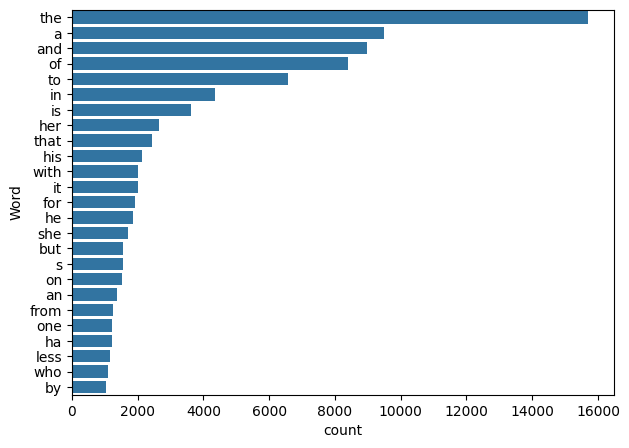

In [ ]:
#Function to visualize the words and frequency in book's summary.


# print 25 most frequent words
freqwords(books['synopsis'], 25)

In [ ]:
# Split data into features (X) and target (y)
X = books['synopsis']  # Features - synopsis text
y = books['genre']      # Target - genre

# Split the data into training (80%) and testing (20%) sets
xtrain, xval, ytrain, yval = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the number of items in training and testing splits
print(f"Training data size: {len(xtrain)}")
print(f"Testing data size: {len(xval)}")


Training data size: 1231
Testing data size: 308


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain.values.astype('U'))

xval_tfidf = tfidf_vectorizer.transform(xval.values.astype('U'))

In [ ]:
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Start timer
start = datetime.now()

# Initialize Logistic Regression and wrap it with OneVsRestClassifier
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

# Train the model on training data
clf.fit(xtrain_tfidf, ytrain)

# Predict on the validation set
y_pred_lr = clf.predict(xval_tfidf)

# Evaluate model performance
accuracy = accuracy_score(yval, y_pred_lr)
report = classification_report(yval, y_pred_lr)

# Output results
print(f"Accuracy Score: {accuracy}")
print("\nClassification Report:")
print(report)

# End timer and print execution time
end_time = datetime.now()
print(f"\nExecuted in: {end_time - start}")


Accuracy Score: 0.6298701298701299

Classification Report:
                 precision    recall  f1-score   support

        fantasy       0.78      0.93      0.85        69
        history       0.71      0.28      0.40        18
         horror       0.00      0.00      0.00        15
     psychology       0.65      0.62      0.63        21
        romance       0.00      0.00      0.00        24
        science       1.00      0.29      0.44        21
science_fiction       0.00      0.00      0.00         5
         sports       0.00      0.00      0.00        17
       thriller       0.54      1.00      0.70       100
         travel       1.00      0.33      0.50        18

       accuracy                           0.63       308
      macro avg       0.47      0.34      0.35       308
   weighted avg       0.56      0.63      0.54       308


Executed in: 0:00:01.065635


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
start=datetime.now()

from sklearn import svm

svc = svm.SVC(kernel='linear').fit(xtrain_tfidf,ytrain)

svpred=svc.predict(xval_tfidf)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print( 'Accuracy Score :',accuracy_score(yval,svpred) )
print ('Report : ')
print(classification_report(yval,svpred))

print("Executed in ",datetime.now()-start)

Accuracy Score : 0.7727272727272727
Report : 
                 precision    recall  f1-score   support

        fantasy       0.82      0.96      0.89        69
        history       0.75      0.67      0.71        18
         horror       1.00      0.13      0.24        15
     psychology       0.86      0.86      0.86        21
        romance       0.57      0.17      0.26        24
        science       0.94      0.71      0.81        21
science_fiction       1.00      0.20      0.33         5
         sports       1.00      0.59      0.74        17
       thriller       0.69      0.99      0.81       100
         travel       0.92      0.61      0.73        18

       accuracy                           0.77       308
      macro avg       0.86      0.59      0.64       308
   weighted avg       0.79      0.77      0.74       308

Executed in  0:00:04.080058


In [ ]:
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Start timer
start = datetime.now()

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(xtrain_tfidf, ytrain)

# Predict on validation data
y_pred_rf = rf.predict(xval_tfidf)

# Evaluate the model
accuracy = accuracy_score(yval, y_pred_rf)
report = classification_report(yval, y_pred_rf)

# Output results
print(f"Accuracy Score: {accuracy}")
print("\nClassification Report:")
print(report)

# End timer and print execution time
end_time = datetime.now()
print(f"\nExecuted in: {end_time - start}")


Accuracy Score: 0.6331168831168831

Classification Report:
                 precision    recall  f1-score   support

        fantasy       0.67      0.77      0.72        69
        history       0.78      0.39      0.52        18
         horror       0.00      0.00      0.00        15
     psychology       0.72      0.62      0.67        21
        romance       0.00      0.00      0.00        24
        science       0.85      0.52      0.65        21
science_fiction       0.00      0.00      0.00         5
         sports       1.00      0.24      0.38        17
       thriller       0.57      0.96      0.71       100
         travel       0.69      0.61      0.65        18

       accuracy                           0.63       308
      macro avg       0.53      0.41      0.43       308
   weighted avg       0.58      0.63      0.57       308


Executed in: 0:00:01.641916


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from datetime import datetime
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd  # Import pandas for Series manipulation

start = datetime.now()

# Train the SVM classifier
svc = svm.SVC(kernel='linear')
svc.fit(xtrain_tfidf, ytrain)

# Make predictions on the first 10 examples from the validation set
test_samples = xval_tfidf[:10]  # Select the first 10 book samples
predictions = svc.predict(test_samples)

# Convert yval to a pandas Series for proper index-based access
yval_series = pd.Series(yval)

# Print the predictions with book titles and their actual genres
for idx, pred in enumerate(predictions):
    print(f"Book: {books.iloc[idx]['title']}")
    print(f"Predicted genre: {pred}")
    print(f"Actual genre: {yval_series.iloc[idx]}")
    print("-" * 50)  # Separator for clarity between predictions

# Evaluate the accuracy of the first 10 predictions
print("\nAccuracy Score:", accuracy_score(yval[:10], predictions))
print("\nClassification Report:")
print(classification_report(yval[:10], predictions))

# Print execution time
print("\nExecuted in:", datetime.now() - start)


Book: Sapiens: A Brief History of Humankind
Predicted genre: fantasy
Actual genre: fantasy
--------------------------------------------------
Book: Guns, Germs, and Steel: The Fates of Human Societies
Predicted genre: thriller
Actual genre: thriller
--------------------------------------------------
Book: A People's History of the United States
Predicted genre: thriller
Actual genre: romance
--------------------------------------------------
Book: The Devil in the White City: Murder, Magic, and Madness at the Fair That Changed America
Predicted genre: thriller
Actual genre: thriller
--------------------------------------------------
Book: The Diary of a Young Girl
Predicted genre: thriller
Actual genre: travel
--------------------------------------------------
Book: 1776
Predicted genre: history
Actual genre: history
--------------------------------------------------
Book: A Short History of Nearly Everything
Predicted genre: romance
Actual genre: travel
-------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Enhance TF-IDF vectorization with bi-grams and minimum document frequency
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000, ngram_range=(1, 2), min_df=5)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain.values.astype('U'))
xval_tfidf = tfidf_vectorizer.transform(xval.values.astype('U'))

In [ ]:
# Logistic Regression - Hyperparameter Tuning
print("\nRunning hyperparameter tuning for Logistic Regression...")
param_grid_lr = {'C': [0.1, 1, 10, 100]}  # Logistic Regression hyperparameter tuning
grid_lr = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid_lr, cv=5, n_jobs=-1, scoring='accuracy')
grid_lr.fit(xtrain_tfidf, ytrain)

# Evaluate the best Logistic Regression model
best_lr_model = grid_lr.best_estimator_
y_pred_lr = best_lr_model.predict(xval_tfidf)

# Logistic Regression Results
accuracy_lr = accuracy_score(yval, y_pred_lr)
report_lr = classification_report(yval, y_pred_lr)
print(f"\nLogistic Regression Accuracy Score: {accuracy_lr}")
print("\nClassification Report:\n", report_lr)

# Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(yval, y_pred_lr)


Running hyperparameter tuning for Logistic Regression...

Logistic Regression Accuracy Score: 0.7824675324675324

Classification Report:
                  precision    recall  f1-score   support

        fantasy       0.78      0.94      0.86        69
        history       0.86      0.67      0.75        18
         horror       0.70      0.47      0.56        15
     psychology       0.85      0.81      0.83        21
        romance       0.56      0.38      0.45        24
        science       0.75      0.71      0.73        21
science_fiction       1.00      0.40      0.57         5
         sports       1.00      0.71      0.83        17
       thriller       0.77      0.89      0.82       100
         travel       0.87      0.72      0.79        18

       accuracy                           0.78       308
      macro avg       0.81      0.67      0.72       308
   weighted avg       0.78      0.78      0.77       308



In [ ]:
# Support Vector Machine (SVM) - Hyperparameter Tuning
print("\nRunning hyperparameter tuning for SVM...")
param_grid_svm = {'C': [0.1, 1, 10, 100]}  # SVM hyperparameter tuning
grid_svm = GridSearchCV(svm.SVC(kernel='linear', class_weight='balanced'), param_grid_svm, cv=5, n_jobs=-1, scoring='accuracy')
grid_svm.fit(xtrain_tfidf, ytrain)

# Evaluate the best SVM model
best_svm_model = grid_svm.best_estimator_
y_pred_svm = best_svm_model.predict(xval_tfidf)

# SVM Results
accuracy_svm = accuracy_score(yval, y_pred_svm)
report_svm = classification_report(yval, y_pred_svm)
print(f"\nSVM Accuracy Score: {accuracy_svm}")
print("\nClassification Report:\n", report_svm)

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(yval, y_pred_svm)


Running hyperparameter tuning for SVM...

SVM Accuracy Score: 0.7662337662337663

Classification Report:
                  precision    recall  f1-score   support

        fantasy       0.80      0.96      0.87        69
        history       0.80      0.67      0.73        18
         horror       0.58      0.47      0.52        15
     psychology       0.85      0.81      0.83        21
        romance       0.44      0.33      0.38        24
        science       0.79      0.71      0.75        21
science_fiction       0.67      0.40      0.50         5
         sports       1.00      0.59      0.74        17
       thriller       0.76      0.87      0.81       100
         travel       0.86      0.67      0.75        18

       accuracy                           0.77       308
      macro avg       0.76      0.65      0.69       308
   weighted avg       0.76      0.77      0.76       308



In [ ]:
# Random Forest - Hyperparameter Tuning
print("\nRunning hyperparameter tuning for Random Forest...")
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15]}  # Random Forest hyperparameter tuning
grid_rf = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')
grid_rf.fit(xtrain_tfidf, ytrain)

# Evaluate the best Random Forest model
best_rf_model = grid_rf.best_estimator_
y_pred_rf = best_rf_model.predict(xval_tfidf)

# Random Forest Results
accuracy_rf = accuracy_score(yval, y_pred_rf)
report_rf = classification_report(yval, y_pred_rf)
print(f"\nRandom Forest Accuracy Score: {accuracy_rf}")
print("\nClassification Report:\n", report_rf)

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(yval, y_pred_rf)


Running hyperparameter tuning for Random Forest...

Random Forest Accuracy Score: 0.6915584415584416

Classification Report:
                  precision    recall  f1-score   support

        fantasy       0.78      0.72      0.75        69
        history       0.65      0.72      0.68        18
         horror       0.31      0.27      0.29        15
     psychology       0.75      0.86      0.80        21
        romance       0.42      0.33      0.37        24
        science       0.79      0.71      0.75        21
science_fiction       0.60      0.60      0.60         5
         sports       0.82      0.82      0.82        17
       thriller       0.70      0.73      0.71       100
         travel       0.68      0.83      0.75        18

       accuracy                           0.69       308
      macro avg       0.65      0.66      0.65       308
   weighted avg       0.69      0.69      0.69       308



In [ ]:
from datetime import datetime
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd  # Import pandas for Series manipulation

start = datetime.now()

# Logistic Regression
print("\nTraining Logistic Regression...")
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(xtrain_tfidf, ytrain)

# Make predictions for the first 10 examples from validation set
test_samples = xval_tfidf[:10]  # Select the first 10 book samples
predictions_lr = log_reg.predict(test_samples)

# Convert yval to a pandas Series for proper index-based access
yval_series = pd.Series(yval)

print("\nLogistic Regression Predictions:")
for idx, pred in enumerate(predictions_lr):
    print(f"Book: {books.iloc[idx]['title']}")
    print(f"Predicted genre: {pred}")
    print(f"Actual genre: {yval_series.iloc[idx]}")
    print("-" * 50)  # Separator for clarity between predictions

# Evaluate Logistic Regression
accuracy_lr = accuracy_score(yval[:10], predictions_lr)
report_lr = classification_report(yval[:10], predictions_lr)
print("\nLogistic Regression Accuracy Score:", accuracy_lr)
print("\nLogistic Regression Classification Report:")
print(report_lr)

# SVM
print("\nTraining SVM...")
svc = svm.SVC(kernel='linear', class_weight='balanced')
svc.fit(xtrain_tfidf, ytrain)

# Make predictions for the first 10 examples from validation set
predictions_svm = svc.predict(test_samples)

print("\nSVM Predictions:")
for idx, pred in enumerate(predictions_svm):
    print(f"Book: {books.iloc[idx]['title']}")
    print(f"Predicted genre: {pred}")
    print(f"Actual genre: {yval_series.iloc[idx]}")
    print("-" * 50)  # Separator for clarity between predictions

# Evaluate SVM
accuracy_svm = accuracy_score(yval[:10], predictions_svm)
report_svm = classification_report(yval[:10], predictions_svm)
print("\nSVM Accuracy Score:", accuracy_svm)
print("\nSVM Classification Report:")
print(report_svm)

# Random Forest
print("\nTraining Random Forest...")
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
rf.fit(xtrain_tfidf, ytrain)

# Make predictions for the first 10 examples from validation set
predictions_rf = rf.predict(test_samples)

print("\nRandom Forest Predictions:")
for idx, pred in enumerate(predictions_rf):
    print(f"Book: {books.iloc[idx]['title']}")
    print(f"Predicted genre: {pred}")
    print(f"Actual genre: {yval_series.iloc[idx]}")
    print("-" * 50)  # Separator for clarity between predictions

# Evaluate Random Forest
accuracy_rf = accuracy_score(yval[:10], predictions_rf)
report_rf = classification_report(yval[:10], predictions_rf)
print("\nRandom Forest Accuracy Score:", accuracy_rf)
print("\nRandom Forest Classification Report:")
print(report_rf)

# Execution Time
print("\nExecuted in:", datetime.now() - start)



Training Logistic Regression...

Logistic Regression Predictions:
Book: Sapiens: A Brief History of Humankind
Predicted genre: fantasy
Actual genre: fantasy
--------------------------------------------------
Book: Guns, Germs, and Steel: The Fates of Human Societies
Predicted genre: thriller
Actual genre: thriller
--------------------------------------------------
Book: A People's History of the United States
Predicted genre: romance
Actual genre: romance
--------------------------------------------------
Book: The Devil in the White City: Murder, Magic, and Madness at the Fair That Changed America
Predicted genre: thriller
Actual genre: thriller
--------------------------------------------------
Book: The Diary of a Young Girl
Predicted genre: romance
Actual genre: travel
--------------------------------------------------
Book: 1776
Predicted genre: history
Actual genre: history
--------------------------------------------------
Book: A Short History of Nearly Everything
Predicted ge

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



SVM Predictions:
Book: Sapiens: A Brief History of Humankind
Predicted genre: fantasy
Actual genre: fantasy
--------------------------------------------------
Book: Guns, Germs, and Steel: The Fates of Human Societies
Predicted genre: thriller
Actual genre: thriller
--------------------------------------------------
Book: A People's History of the United States
Predicted genre: romance
Actual genre: romance
--------------------------------------------------
Book: The Devil in the White City: Murder, Magic, and Madness at the Fair That Changed America
Predicted genre: thriller
Actual genre: thriller
--------------------------------------------------
Book: The Diary of a Young Girl
Predicted genre: romance
Actual genre: travel
--------------------------------------------------
Book: 1776
Predicted genre: history
Actual genre: history
--------------------------------------------------
Book: A Short History of Nearly Everything
Predicted genre: romance
Actual genre: travel
---------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Predictions:
Book: Sapiens: A Brief History of Humankind
Predicted genre: fantasy
Actual genre: fantasy
--------------------------------------------------
Book: Guns, Germs, and Steel: The Fates of Human Societies
Predicted genre: thriller
Actual genre: thriller
--------------------------------------------------
Book: A People's History of the United States
Predicted genre: romance
Actual genre: romance
--------------------------------------------------
Book: The Devil in the White City: Murder, Magic, and Madness at the Fair That Changed America
Predicted genre: thriller
Actual genre: thriller
--------------------------------------------------
Book: The Diary of a Young Girl
Predicted genre: thriller
Actual genre: travel
--------------------------------------------------
Book: 1776
Predicted genre: history
Actual genre: history
--------------------------------------------------
Book: A Short History of Nearly Everything
Predicted genre: fantasy
Actual genre: travel
----

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


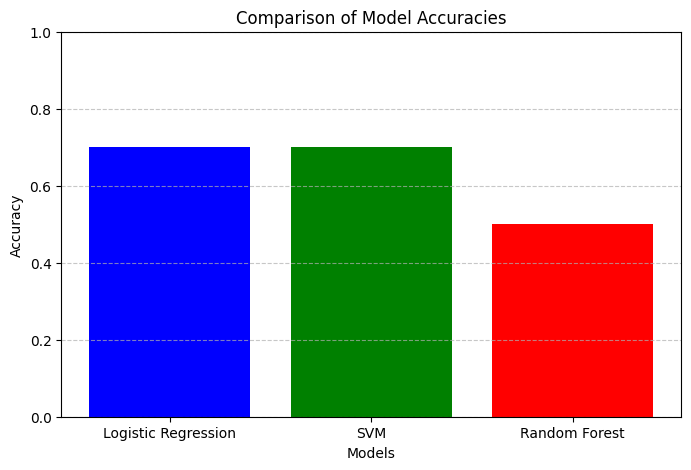

In [ ]:
import matplotlib.pyplot as plt

# Model names and accuracies
models = ['Logistic Regression', 'SVM', 'Random Forest']
accuracies = [accuracy_lr, accuracy_svm, accuracy_rf]

# Plotting the bar graph
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Setting y-axis range from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7, which='both')

# Displaying the graph
plt.show()
